### Design a Customize Convolution Neural Netwok (CNN) for handwritten Digit Classification with
## the following specification :

## (a) Generate a CNN model with : 
  ## 1. Two CNN hidden layers (Conv2D) of sizes 32,64, followed by 
  ## 2. ReLU Activation and 
  ## 3. MaxPooling2D with Kernal size (3,3) and Stride=(1,1)

## (b) Use Flatten Layers to convert the feature  map into 1D with a Dense layer of size 64 followed by an output Dense Layer of Size 10 with SoftMax Activation Function .

## (c) Display the generated  CNN with the required number of parameters.

## (d) Use the MNIST database for training and testing . 

## (e) Adopt Data augmentation (rotation , shift ) with the MNIST dataset .

## (f) Train two CNNs using the original MNIST dataset and augmented MNIST dataset.

## (g) Use the test MNIST dataset as well as the augmented test MNIST dataset to predict the 
    accuracy of the two trained CNNs . 

## (h) Compare and plot the prediction accuracy of the two CNNs.

## Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


### Load and Preprocess the MNIST Dataset

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


### Create the CNN Model

In [3]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((3, 3), strides=(1, 1)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(1, 1)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and display model summary
model = create_model()
model.summary()


c:\Users\Md. Nadim Mir\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,657,930 (6.32 MB)

 Trainable params: 1,657,930 (6.32 MB)

 Non-trainable params: 0 (0.00 B)

## Setup Data Augmentation

In [4]:
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images randomly
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1  # Vertical shift
)
datagen.fit(x_train)  # Apply augmentation on training data


## Train CNN on Original Data

In [5]:
print("Training on Original MNIST Data...")
history_orig = model.fit(x_train, y_train, epochs=5, batch_size=64, 
                         validation_data=(x_test, y_test))


Training on Original MNIST Data...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 113s 110ms/step - accuracy: 0.9130 - loss: 0.2828 - val_accuracy: 0.9861 - val_loss: 0.0445
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 98s 104ms/step - accuracy: 0.9862 - loss: 0.0447 - val_accuracy: 0.9904 - val_loss: 0.0268
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 93s 99ms/step - accuracy: 0.9911 - loss: 0.0279 - val_accuracy: 0.9873 - val_loss: 0.0392
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 104s 111ms/step - accuracy: 0.9930 - loss: 0.0211 - val_accuracy: 0.9911 - val_loss: 0.0252
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 98s 104ms/step - accuracy: 0.9954 - loss: 0.0148 - val_accuracy: 0.9889 - val_loss: 0.0361


## Train CNN on Augmented Data

In [6]:
print("Training on Augmented MNIST Data...")
aug_model = create_model()  # New model for augmented training
history_aug = aug_model.fit(datagen.flow(x_train, y_train, batch_size=64), 
                            epochs=5, validation_data=(x_test, y_test))


Training on Augmented MNIST Data...


c:\Users\Md. Nadim Mir\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 128s 131ms/step - accuracy: 0.8549 - loss: 0.4518 - val_accuracy: 0.9856 - val_loss: 0.0471
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 114s 122ms/step - accuracy: 0.9704 - loss: 0.0989 - val_accuracy: 0.9865 - val_loss: 0.0466
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 125s 133ms/step - accuracy: 0.9777 - loss: 0.0700 - val_accuracy: 0.9898 - val_loss: 0.0356
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 113s 120ms/step - accuracy: 0.9810 - loss: 0.0581 - val_accuracy: 0.9880 - val_loss: 0.0382
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 103s 109ms/step - accuracy: 0.9840 - loss: 0.0539 - val_accuracy: 0.9904 - val_loss: 0.0325


## Evaluate Both Models

In [7]:
# Evaluate both models on test data
_, acc_orig = model.evaluate(x_test, y_test, verbose=0)
_, acc_aug = aug_model.evaluate(x_test, y_test, verbose=0)

print(f"Accuracy on Original Data: {acc_orig:.2f}")
print(f"Accuracy on Augmented Data: {acc_aug:.2f}")


Accuracy on Original Data: 0.99
Accuracy on Augmented Data: 0.99


## Plot Accuracy Comparison

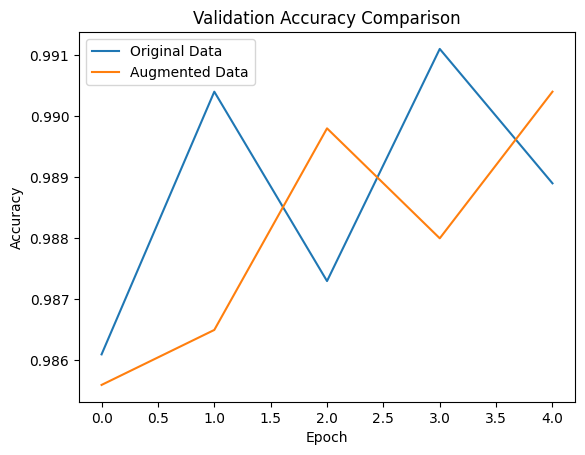

In [8]:
plt.plot(history_orig.history['val_accuracy'], label='Original Data')
plt.plot(history_aug.history['val_accuracy'], label='Augmented Data')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
